# HelloVisa: Conversation predictions/recommendations

Goal:
Predict the next dialog with the data from previous dialogs

In [3]:
import pandas

In [4]:
conversations = pandas.read_json('https://visahelper-9b5f3.firebaseio.com/conversations.json')

In [5]:
conversations

,-KhQ4SYopzNcqMYOdJqR,-KhQ4TfHDo_elS4n9zQd,-KhQ4URMc02t5zwA2otF,-KhQ4WCDLC4BTCIlWsnu,-KhQ7fGgKAbr5SceBbRz,-KhQ7gSMRaFebLq2EDh_,-KhQ7heeiXF-xGxjaKrg,-KhQ8JP4gHZrBD3eQim5,-KhQ8KVrFV7p1oivxCoz,-KhQ8Lm7QV-Qf4UQNkv8,...,-KhQ8sc2ifWWqaqc7BIb,-KhQ8uYB1NRTQQJJlgnT,-KhQ8vf25bMAJYjgzLh3,-KhQ9G_v0AIMe2xZTTVd,-KhQ9HIR5rnU-AEUJR_1,-KhQ9IPuX69vOnG7rIEw,-KhQ9JdySWNFAojnszY2,-KhQ9KZGHL5l9qNNWo3V,-KhQCqH2uRrqT_rx4DNc,-KhR4Iwe_JK2no_J6kkk
dialog-0,holiday/1,holiday/2,holiday/0,None/0,holiday/1,holiday/2,holiday/0,holiday/1,holiday/2,holiday/0,...,holiday/1,holiday/2,holiday/0,greetings/0,visaTypes/0,holiday/1,holiday/2,holiday/0,greetings/0,greetings/0
dialog-1,visaTypes/0,holiday/1,holiday/2,holiday/0,None/0,holiday/1,holiday/2,holiday/0,holiday/1,holiday/2,...,visaTypes/0,holiday/1,holiday/2,holiday/0,greetings/0,visaTypes/0,holiday/1,holiday/2,holiday/0,greetings/0
dialog-2,greetings/0,visaTypes/0,holiday/1,holiday/2,holiday/0,None/0,holiday/1,holiday/2,holiday/0,holiday/1,...,greetings/0,visaTypes/0,holiday/1,holiday/2,holiday/0,greetings/0,visaTypes/0,holiday/1,holiday/2,holiday/0
dialog-3,visaTypes/0,greetings/0,visaTypes/0,holiday/1,holiday/2,holiday/0,None/0,holiday/1,holiday/2,holiday/0,...,holiday/0,greetings/0,visaTypes/0,holiday/1,holiday/2,holiday/0,greetings/0,visaTypes/0,holiday/1,holiday/2
dialog-4,greetings/0,visaTypes/0,greetings/0,visaTypes/0,holiday/1,holiday/2,holiday/0,None/0,holiday/1,holiday/2,...,holiday/2,holiday/0,greetings/0,visaTypes/0,holiday/1,holiday/2,holiday/0,greetings/0,visaTypes/0,holiday/1
userId,898448446925342,898448446925342,898448446925342,898448446925342,898448446925342,898448446925342,898448446925342,898448446925342,898448446925342,898448446925342,...,898448446925342,898448446925342,898448446925342,898448446925342,898448446925342,898448446925342,898448446925342,898448446925342,898448446925342,898448446925342


## Cleanning the data

### Transpose the dataframe

In [6]:
conversationsT = conversations.T

In [7]:
conversationsT

,dialog-0,dialog-1,dialog-2,dialog-3,dialog-4,userId
-KhQ4SYopzNcqMYOdJqR,holiday/1,visaTypes/0,greetings/0,visaTypes/0,greetings/0,898448446925342
-KhQ4TfHDo_elS4n9zQd,holiday/2,holiday/1,visaTypes/0,greetings/0,visaTypes/0,898448446925342
-KhQ4URMc02t5zwA2otF,holiday/0,holiday/2,holiday/1,visaTypes/0,greetings/0,898448446925342
-KhQ4WCDLC4BTCIlWsnu,None/0,holiday/0,holiday/2,holiday/1,visaTypes/0,898448446925342
-KhQ7fGgKAbr5SceBbRz,holiday/1,None/0,holiday/0,holiday/2,holiday/1,898448446925342
-KhQ7gSMRaFebLq2EDh_,holiday/2,holiday/1,None/0,holiday/0,holiday/2,898448446925342
-KhQ7heeiXF-xGxjaKrg,holiday/0,holiday/2,holiday/1,None/0,holiday/0,898448446925342
-KhQ8JP4gHZrBD3eQim5,holiday/1,holiday/0,holiday/2,holiday/1,None/0,898448446925342
-KhQ8KVrFV7p1oivxCoz,holiday/2,holiday/1,holiday/0,holiday/2,holiday/1,898448446925342
-KhQ8Lm7QV-Qf4UQNkv8,holiday/0,holiday/2,holiday/1,holiday/0,holiday/2,898448446925342


## let's transform intents into dummies boolean

In [8]:
# check the number of unique intent/steps
uniqueIntent = conversationsT['dialog-1'].unique()
uniqueIntent

array(['visaTypes/0', 'holiday/1', 'holiday/2', 'holiday/0', 'None/0',
       'greetings/0'], dtype=object)

In [9]:
dialog1df = pandas.get_dummies(conversationsT['dialog-1'], prefix='dialog-1')
# dialog2df = pandas.get_dummies(conversationsT['dialog-1'], prefix='dialog-2')
conversationsWithInt = conversationsT.join(dialog1df, how='outer')

In [10]:
conversationsWithInt

,dialog-0,dialog-1,dialog-2,dialog-3,dialog-4,userId,dialog-1_None/0,dialog-1_greetings/0,dialog-1_holiday/0,dialog-1_holiday/1,dialog-1_holiday/2,dialog-1_visaTypes/0
-KhQ4SYopzNcqMYOdJqR,holiday/1,visaTypes/0,greetings/0,visaTypes/0,greetings/0,898448446925342,0,0,0,0,0,1
-KhQ4TfHDo_elS4n9zQd,holiday/2,holiday/1,visaTypes/0,greetings/0,visaTypes/0,898448446925342,0,0,0,1,0,0
-KhQ4URMc02t5zwA2otF,holiday/0,holiday/2,holiday/1,visaTypes/0,greetings/0,898448446925342,0,0,0,0,1,0
-KhQ4WCDLC4BTCIlWsnu,None/0,holiday/0,holiday/2,holiday/1,visaTypes/0,898448446925342,0,0,1,0,0,0
-KhQ7fGgKAbr5SceBbRz,holiday/1,None/0,holiday/0,holiday/2,holiday/1,898448446925342,1,0,0,0,0,0
-KhQ7gSMRaFebLq2EDh_,holiday/2,holiday/1,None/0,holiday/0,holiday/2,898448446925342,0,0,0,1,0,0
-KhQ7heeiXF-xGxjaKrg,holiday/0,holiday/2,holiday/1,None/0,holiday/0,898448446925342,0,0,0,0,1,0
-KhQ8JP4gHZrBD3eQim5,holiday/1,holiday/0,holiday/2,holiday/1,None/0,898448446925342,0,0,1,0,0,0
-KhQ8KVrFV7p1oivxCoz,holiday/2,holiday/1,holiday/0,holiday/2,holiday/1,898448446925342,0,0,0,1,0,0
-KhQ8Lm7QV-Qf4UQNkv8,holiday/0,holiday/2,holiday/1,holiday/0,holiday/2,898448446925342,0,0,0,0,1,0


# Predictions

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dtc = DecisionTreeClassifier()

X = conversationsWithInt[['dialog-1_None/0', 
                    'dialog-1_greetings/0', 
                    'dialog-1_holiday/0', 
                    'dialog-1_holiday/1', 
                    'dialog-1_holiday/2', 
                    'dialog-1_visaTypes/0', 
                    'userId']]

y = conversationsWithInt['dialog-0']

In [13]:
dtc.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [14]:
# Predicting the next step after dialog-1_holiday/1
dtc.predict_proba([[0,0,0,1,0,0,898448446925342]])

array([[ 0.,  0.,  0.,  0.,  1.,  0.]])

In [15]:
# Predicting the next step after greetings
dtc.predict_proba([[0,1,0,0,0,0,898448446925342]])

array([[ 0.        ,  0.33333333,  0.        ,  0.        ,  0.        ,
         0.66666667]])

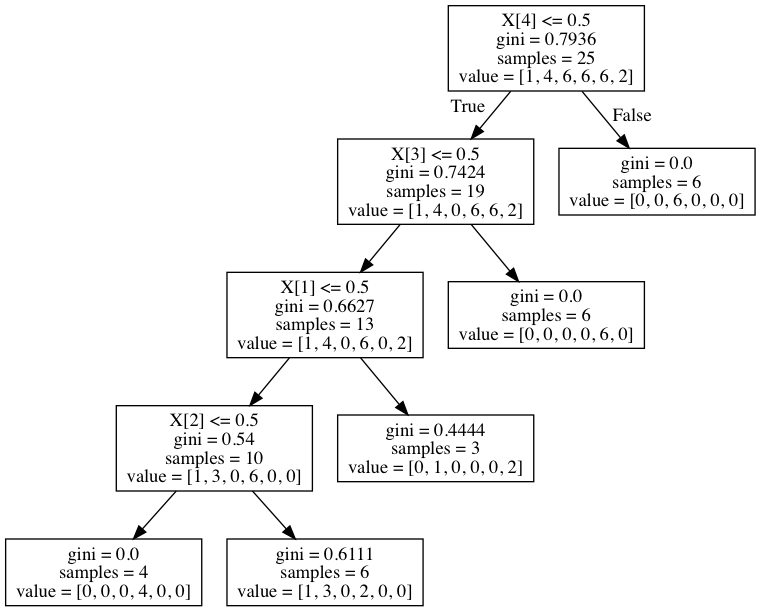

In [16]:
try:
 from StringIO import StringIO
except ImportError:
 from io import StringIO
import sklearn.tree
import IPython.display
import pydot
import pydotplus
File_obj = StringIO()

dot_data = StringIO()
sklearn.tree.export_graphviz(dtc, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
IPython.display.Image(graph.create_png())

In [17]:
# sklearn.tree.export_graphviz(dtc, out_file=File_obj, feature_names=features)

# print(File_obj.getvalue())

# value = """digraph Tree {node [shape=box] ;
# 0 [label="Gender <= 0.5\ngini = 0.4824\nsamples = 714\nvalue = [424, 290]"] ;
# 1 [label="gini = 0.3702\nsamples = 261\nvalue = [64, 197]"] ;
# 0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
# 2 [label="gini = 0.3263\nsamples = 453\nvalue = [360, 93]"] ;
# 0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
# }'"""

# Graph = pydotplus.graph_from_dot_data(value)
# IPython.display.Image(Graph[0].create_png())

### todo:

- Clean the data: Remove Step


- Expose result into API 

## Save the trainned model into db 

In [39]:
import pickle
s = pickle.dumps(dtc)

['trained-model-py3']

In [21]:
# display serialized trained model
s

b'\x80\x03csklearn.tree.tree\nDecisionTreeClassifier\nq\x00)\x81q\x01}q\x02(X\t\x00\x00\x00criterionq\x03X\x04\x00\x00\x00giniq\x04X\x08\x00\x00\x00splitterq\x05X\x04\x00\x00\x00bestq\x06X\t\x00\x00\x00max_depthq\x07NX\x11\x00\x00\x00min_samples_splitq\x08K\x02X\x10\x00\x00\x00min_samples_leafq\tK\x01X\x18\x00\x00\x00min_weight_fraction_leafq\nG\x00\x00\x00\x00\x00\x00\x00\x00X\x0c\x00\x00\x00max_featuresq\x0bNX\x0c\x00\x00\x00random_stateq\x0cNX\x0e\x00\x00\x00max_leaf_nodesq\rNX\x12\x00\x00\x00min_impurity_splitq\x0eG>z\xd7\xf2\x9a\xbc\xafHX\x0c\x00\x00\x00class_weightq\x0fNX\x07\x00\x00\x00presortq\x10\x89X\x0b\x00\x00\x00n_features_q\x11K\x07X\n\x00\x00\x00n_outputs_q\x12K\x01X\x08\x00\x00\x00classes_q\x13cnumpy.core.multiarray\n_reconstruct\nq\x14cnumpy\nndarray\nq\x15K\x00\x85q\x16C\x01bq\x17\x87q\x18Rq\x19(K\x01K\x06\x85q\x1acnumpy\ndtype\nq\x1bX\x02\x00\x00\x00O8q\x1cK\x00K\x01\x87q\x1dRq\x1e(K\x03X\x01\x00\x00\x00|q\x1fNNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK?tq b\x89]q!(X\x06\x

## Save the serialized model into db

In [22]:
import requests
import json
import base64

In [23]:
# b64model = base64.b64encode(s)
# stringModel = s.decode('windows-1252')
# url = 'https://visahelper-9b5f3.firebaseio.com/ml.json'
# # r = requests.get(url) 
# # r.content
# requests.put(url=url, data = '{ "prediction_model": "' + stringModel + '" }') 

In [24]:
# b64model.title

### Saving model as bytes into db is annoying so moving on

## Saving serialized model as file into server

In [25]:
import pyrebase

config = {
#     Login and password not in github
}

firebase = pyrebase.initialize_app(config)

In [26]:
storage = firebase.storage()

In [27]:
storage.child("models/predictions_model_0").put(s)

{'bucket': 'visahelper-9b5f3.appspot.com',
 'contentDisposition': "inline; filename*=utf-8''predictions_model_0",
 'contentEncoding': 'identity',
 'crc32c': 'vTL1cQ==',
 'downloadTokens': '0db36bcf-4e99-4a98-bfa1-1573cb49e0c4',
 'etag': 'CJCy28zrntMCEAE=',
 'generation': '1491997442890000',
 'md5Hash': 'T6qc9mrpmi7eZAmxUyxEog==',
 'metageneration': '1',
 'name': 'models/predictions_model_0',
 'size': '2276',
 'storageClass': 'STANDARD',
 'timeCreated': '2017-04-12T11:44:02.813Z',
 'updated': '2017-04-12T11:44:02.813Z'}

## Test if we can get back the file and run the model

In [28]:
# we can download the file like that
# modelFromFirebase = storage.child("models/predictions_model")
# modelFromFirebase.download('./predictions_model')

In [29]:
# here we want the file content only
r = requests.get('https://firebasestorage.googleapis.com/v0/b/visahelper-9b5f3.appspot.com/o/models%2Fpredictions_model_0?alt=media&token=3e89641b-36bf-48ac-a489-11b108c6acba')
savedModel = r.content
savedModel

b'\x80\x03csklearn.tree.tree\nDecisionTreeClassifier\nq\x00)\x81q\x01}q\x02(X\t\x00\x00\x00criterionq\x03X\x04\x00\x00\x00giniq\x04X\x08\x00\x00\x00splitterq\x05X\x04\x00\x00\x00bestq\x06X\t\x00\x00\x00max_depthq\x07NX\x11\x00\x00\x00min_samples_splitq\x08K\x02X\x10\x00\x00\x00min_samples_leafq\tK\x01X\x18\x00\x00\x00min_weight_fraction_leafq\nG\x00\x00\x00\x00\x00\x00\x00\x00X\x0c\x00\x00\x00max_featuresq\x0bNX\x0c\x00\x00\x00random_stateq\x0cNX\x0e\x00\x00\x00max_leaf_nodesq\rNX\x12\x00\x00\x00min_impurity_splitq\x0eG>z\xd7\xf2\x9a\xbc\xafHX\x0c\x00\x00\x00class_weightq\x0fNX\x07\x00\x00\x00presortq\x10\x89X\x0b\x00\x00\x00n_features_q\x11K\x07X\n\x00\x00\x00n_outputs_q\x12K\x01X\x08\x00\x00\x00classes_q\x13cnumpy.core.multiarray\n_reconstruct\nq\x14cnumpy\nndarray\nq\x15K\x00\x85q\x16C\x01bq\x17\x87q\x18Rq\x19(K\x01K\x06\x85q\x1acnumpy\ndtype\nq\x1bX\x02\x00\x00\x00O8q\x1cK\x00K\x01\x87q\x1dRq\x1e(K\x03X\x01\x00\x00\x00|q\x1fNNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK?tq b\x89]q!(X\x06\x

In [30]:
type(savedModel)

bytes

## Unpicke to recreate the model from bytes to python object

In [31]:
modelReady = pickle.loads(savedModel) 

# Predict

In [32]:
# Predicting the next step after dialog-1_holiday/1
modelReady.predict_proba([[0,0,0,1,0,0,898448446925342]])

array([[ 0.,  0.,  0.,  0.,  1.,  0.]])

In [33]:
# Predicting the next step after greetings
dtc.predict_proba([[0,1,0,0,0,0,898448446925342]])

array([[ 0.        ,  0.33333333,  0.        ,  0.        ,  0.        ,
         0.66666667]])

In [41]:
import requests
# test
fileName = 'trained-model-py3'
# fileUrl = 'https://firebasestorage.googleapis.com/v0/b/visahelper-9b5f3.appspot.com/o/models%2Fpredictions_model_0?alt=media&token=3e89641b-36bf-48ac-a489-11b108c6acba'
fileUrl = 'https://firebasestorage.googleapis.com/v0/b/visahelper-9b5f3.appspot.com/o/models%2F' + fileName + '?alt=media&token=3e89641b-36bf-48ac-a489-11b108c6acba'
r = requests.get(fileUrl)
savedModel = r.content
# savedModel
# print(savedModel)

modelReady = pickle.loads(savedModel)
prediction = modelReady.predict_proba([[0,0,0,1,0,0,898448446925342]])
prediction

array([[ 0.,  0.,  0.,  0.,  1.,  0.]])